In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy

In [54]:
matplotlib.__version__

'3.7.1'

In [55]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [56]:
# Define Path
df = pd.read_csv(r"C:\Users\danie\Desktop\Dan\Career Foundry\Achievement Six\Netflix Movies and Shows\imdb_movies_shows.csv2nd_prep_data.csv")

In [57]:
path = (r"C:\Users\danie\Desktop\Dan\Career Foundry\Achievement Six\Netflix Movies and Shows\imdb_movies_shows.csvclean_data.csv")

In [58]:
path

'C:\\Users\\danie\\Desktop\\Dan\\Career Foundry\\Achievement Six\\Netflix Movies and Shows\\imdb_movies_shows.csvclean_data.csv'

Create a correlation heatmap using seaborn:

In [59]:
df.head()

,Unnamed: 0,title,type,release_year,runtime,genres,production_countries,full name,seasons,imdb_score,imdb_votes
0,0,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],['US'],United States of America (the),1.0,NaN,NaN
1,1,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",['US'],United States of America (the),NaN,8.3,795222.0
2,2,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",['GB'],United Kingdom of Great Britain and Northern I...,NaN,8.2,530877.0
3,3,Life of Brian,MOVIE,1979,94,['comedy'],['GB'],United Kingdom of Great Britain and Northern I...,NaN,8.0,392419.0
4,4,The Exorcist,MOVIE,1973,133,['horror'],['US'],United States of America (the),NaN,8.1,391942.0


In [60]:
df.columns

Index(['Unnamed: 0', 'title', 'type', 'release_year', 'runtime', 'genres',
       'production_countries', 'full name', 'seasons', 'imdb_score',
       'imdb_votes'],
      dtype='object')

In [61]:
# Create a subset excluding the "title", type, age_certification, genres, imdb_id, and "seasons" columns
sub = df[['release_year', 'runtime', 'seasons', 'imdb_votes']]


In [62]:
sub

,release_year,runtime,seasons,imdb_votes
0,1945,48,1.0,NaN
1,1976,113,NaN,795222.0
2,1975,91,NaN,530877.0
3,1979,94,NaN,392419.0
4,1973,133,NaN,391942.0
...,...,...,...,...
5553,2021,107,NaN,950.0
5554,2021,24,1.0,NaN
5555,2021,108,NaN,26.0
5556,2021,100,NaN,39.0


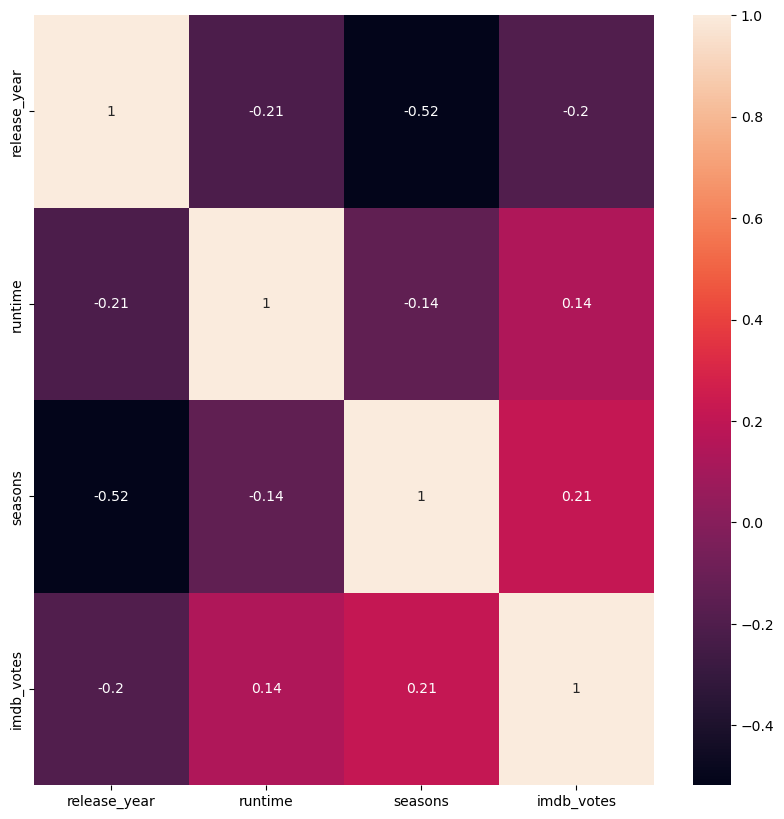

In [63]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Imdb scores & Imdb votes have the highest correlation at .25. However, runtime and score are at .22 and I beleive are a better pair worth digging into.  The votes and the score are too similar, and the scores are a direct result of the # of votes. Too many or too little can have both a psositive ane negative imapct on the result.

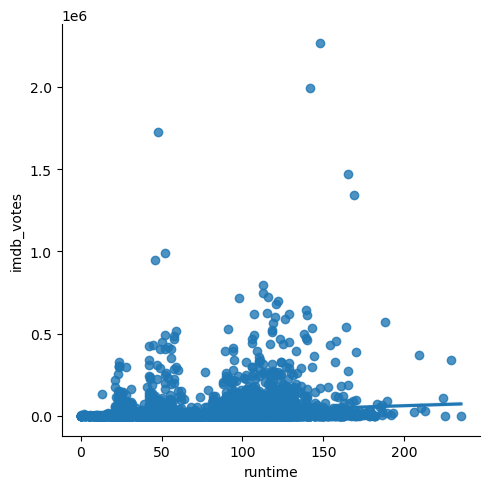

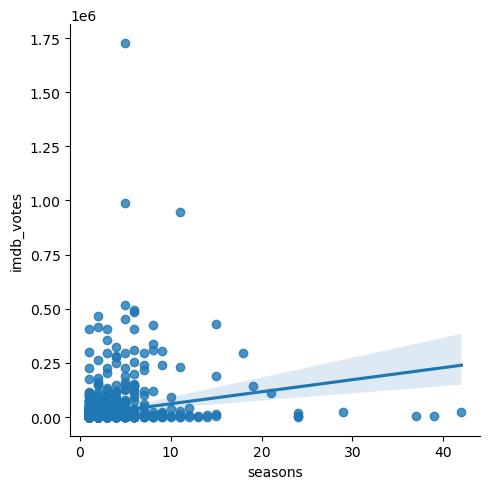

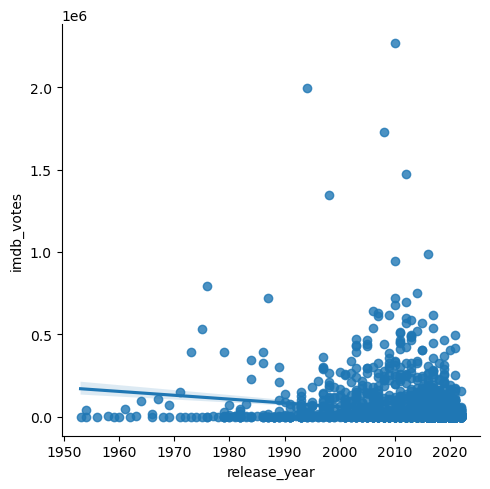

In [73]:
# Create a scatterplot for the "idmb_score" and "Imdb_votes" price per unit" columns in seaborn

sns.lmplot(x = 'runtime', y = 'imdb_votes', data = df)
sns.lmplot(x = 'seasons', y = 'imdb_votes', data = df)
sns.lmplot(x = 'release_year', y = 'imdb_votes', data = df)

Imdb_votes is my primary. I ran it against release year, runtime and seasons. 
There is an upward trajectory bewteen votes and seasons

Pair plots

In [65]:
# Keep only the variables you want to use in the pair plot
sub_2 = sub [['release_year', 'runtime', 'seasons', 'imdb_votes']]

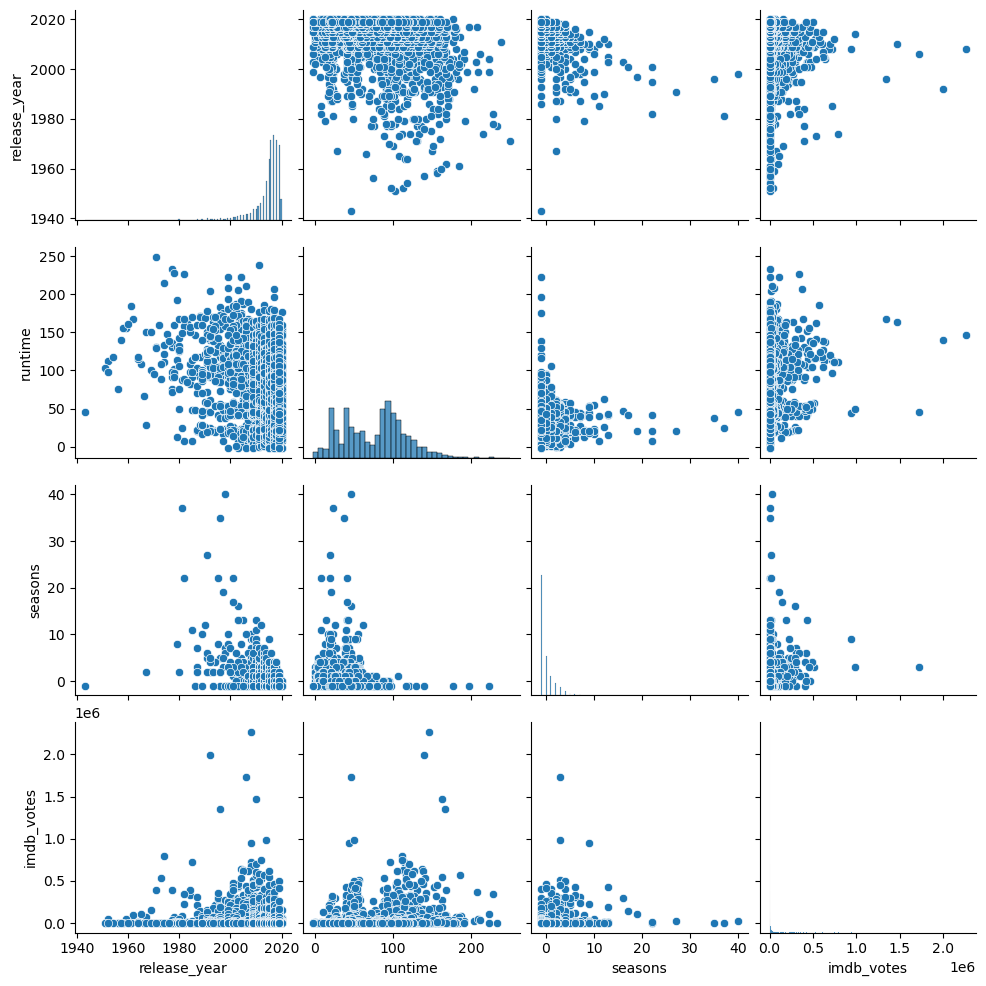

In [66]:
# create a pair plot
g = sns.pairplot(sub-2)

aside from runtime & release year. It is worth looking into seasons and votes.

Categorical Plots

<Axes: xlabel='imdb_votes', ylabel='Count'>

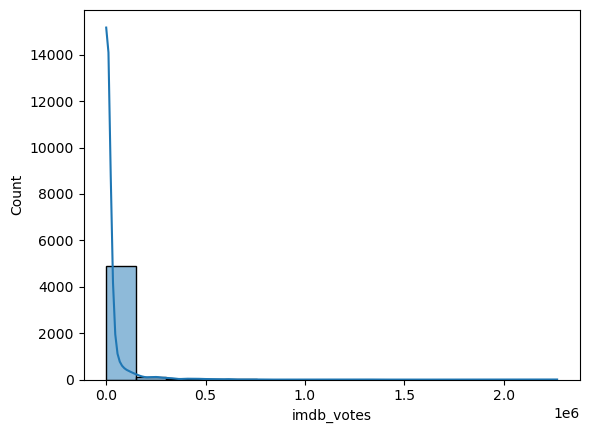

In [67]:
# Use a histogram to visualize the distribution of the variables. 
 
sns.histplot(df['imdb_votes'], bins = 15, kde = True)

The score peaks at 7.5 with the highest count just under 350

<Axes: xlabel='release_year', ylabel='Count'>

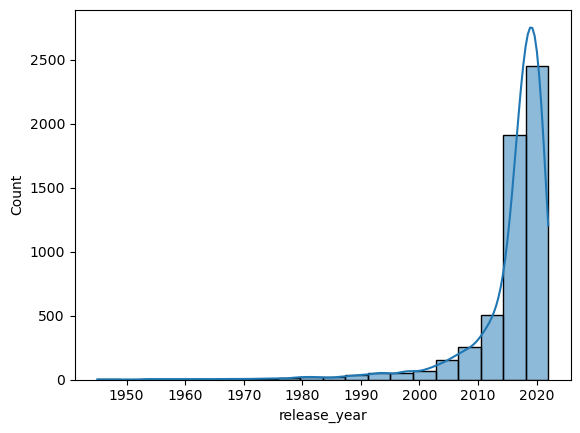

In [68]:
sns.histplot(df['release_year'], bins = 20, kde = True)

<Axes: xlabel='runtime', ylabel='Count'>

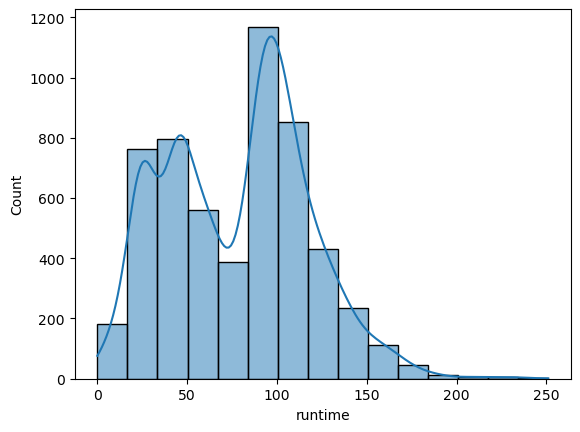

In [69]:
sns.histplot(df['runtime'], bins = 15, kde = True)

<Axes: xlabel='seasons', ylabel='Count'>

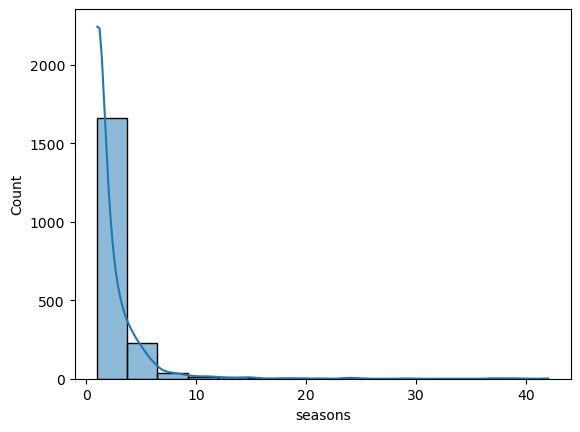

In [70]:
sns.histplot(df['seasons'], bins = 15, kde = True)

Hypotheses: What variables play an active role in which Netflix should focus on building their TV show Library?

Original Questions:

What can be learned from shows released in a specific year? The correlation is too small and irrelevant.

How do the IMDB votes impact the viewer? Tying the runtime into this category could shed light given the strong connection. 

How does the country in which it was produced impact the ratings? I am not sure this will have the impact I was looking for. 

How does the country in which it was produced impact the ratings?

Do the number of seasons impact voting?

How does the runtime impact voting?